# Applied Data Science Capstone Report

## 1. Introduction/Businees problem

This study is based on helping people planning to open a new restaurant in Toronto to chose the right location by providing data about the  income and crime rate of each neighborhood for weighing safety and richness. There are many people in Toronto with high density. it is recommanded to make their restaurant properly

## 2.Data

The data is from foursquare.
To provide the stakeholders the necessary information I'll be combining Toronto's 2016 Census that contains Population, Average income per Neighborhood with Foursquare API to collect competitors on the same neighborhoods.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Bring income data for toronto(2016)

In [2]:
csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


In [3]:
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [4]:
csv_path='https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.csv?outSR=%7B%22latestWkid%22%3A26717%2C%22wkid%22%3A26717%7D'
df1 = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')


Data loaded


In [5]:

df1=df1.sort_values('Neighbourhood')
df1.head()


,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
79,80,Agincourt North,129,29113,67,76,77,71,79,79,74.8,0.00,271.4,17,29,16,32,42,42,29.7,0.00,144.3,46,52,49,49,69,56,53.5,-0.19,192.4,1,0,0,0,0,0,0.2,0.0,0.0,33,36,13,22,42,35,30.2,-0.17,120.2,1,5,5,11,4,2,4.7,-0.50,6.9,7.261857e+06,12381.264970
80,81,Agincourt South-Malvern West,128,23757,107,112,136,115,114,123,117.8,0.08,517.7,32,29,26,35,36,62,36.7,0.72,261.0,73,60,61,92,93,100,79.8,0.08,420.9,0,0,0,0,1,0,0.2,-1.0,0.0,24,23,21,34,33,29,27.3,-0.12,122.1,19,11,11,14,10,15,13.3,0.50,63.1,7.873163e+06,15386.556296
86,87,Alderwood,20,12054,45,47,39,21,30,36,36.3,0.20,298.7,9,18,17,14,25,14,16.2,-0.44,116.1,23,27,26,23,23,26,24.7,0.13,215.7,1,0,0,0,0,0,0.2,0.0,0.0,5,6,11,6,8,5,6.8,-0.38,41.5,7,3,10,7,7,7,6.8,0.00,58.1,4.978488e+06,9168.698727
56,57,Annex,95,30526,213,226,257,248,246,288,246.3,0.17,943.5,13,14,19,23,33,30,22.0,-0.09,98.3,156,106,123,116,172,212,147.5,0.23,694.5,0,0,0,0,2,1,0.5,-0.5,3.3,34,40,34,64,42,31,40.8,-0.26,101.6,22,17,22,29,45,42,29.5,-0.07,137.6,2.790356e+06,7606.039230
84,85,Banbury-Don Mills,42,27695,61,78,84,109,77,74,80.5,-0.04,267.2,19,20,7,16,27,42,21.8,0.56,151.7,65,87,57,64,85,81,73.2,-0.05,292.5,0,0,0,0,0,0,0.0,0.0,0.0,13,29,21,10,7,10,15.0,0.43,36.1,10,14,11,5,8,14,10.3,0.75,50.6,1.004155e+07,18165.123920


In [6]:
Neighbourhoods1 = list(df1.columns.values)

print(Neighbourhoods1)

['OBJECTID', 'Neighbourhood', 'Hood_ID', 'Population', 'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2019', 'AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019', 'AutoTheft_AVG', 'AutoTheft_CHG', 'AutoTheft_Rate_2019', 'BreakandEnter_2014', 'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018', 'BreakandEnter_2019', 'BreakandEnter_AVG', 'BreakandEnter_CHG', 'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015', 'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019', 'Homicide_AVG', 'Homicide_CHG', 'Homicide_Rate_2019', 'Robbery_2014', 'Robbery_2015', 'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_2019', 'Robbery_AVG', 'Robbery_CHG', 'Robbery_Rate_2019', 'TheftOver_2014', 'TheftOver_2015', 'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_2019', 'TheftOver_AVG', 'The

In [7]:
Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]
print(Neighbourhoods)


['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [8]:
dfT = pd.DataFrame(index=Neighbourhoods, columns=['Borough', 'Income_2016'])
dfT.head()

,Borough,Income_2016
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


In [9]:
df1=df1.reset_index()
df1.head()

,index,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,79,80,Agincourt North,129,29113,67,76,77,71,79,79,74.8,0.00,271.4,17,29,16,32,42,42,29.7,0.00,144.3,46,52,49,49,69,56,53.5,-0.19,192.4,1,0,0,0,0,0,0.2,0.0,0.0,33,36,13,22,42,35,30.2,-0.17,120.2,1,5,5,11,4,2,4.7,-0.50,6.9,7.261857e+06,12381.264970
1,80,81,Agincourt South-Malvern West,128,23757,107,112,136,115,114,123,117.8,0.08,517.7,32,29,26,35,36,62,36.7,0.72,261.0,73,60,61,92,93,100,79.8,0.08,420.9,0,0,0,0,1,0,0.2,-1.0,0.0,24,23,21,34,33,29,27.3,-0.12,122.1,19,11,11,14,10,15,13.3,0.50,63.1,7.873163e+06,15386.556296
2,86,87,Alderwood,20,12054,45,47,39,21,30,36,36.3,0.20,298.7,9,18,17,14,25,14,16.2,-0.44,116.1,23,27,26,23,23,26,24.7,0.13,215.7,1,0,0,0,0,0,0.2,0.0,0.0,5,6,11,6,8,5,6.8,-0.38,41.5,7,3,10,7,7,7,6.8,0.00,58.1,4.978488e+06,9168.698727
3,56,57,Annex,95,30526,213,226,257,248,246,288,246.3,0.17,943.5,13,14,19,23,33,30,22.0,-0.09,98.3,156,106,123,116,172,212,147.5,0.23,694.5,0,0,0,0,2,1,0.5,-0.5,3.3,34,40,34,64,42,31,40.8,-0.26,101.6,22,17,22,29,45,42,29.5,-0.07,137.6,2.790356e+06,7606.039230
4,84,85,Banbury-Don Mills,42,27695,61,78,84,109,77,74,80.5,-0.04,267.2,19,20,7,16,27,42,21.8,0.56,151.7,65,87,57,64,85,81,73.2,-0.05,292.5,0,0,0,0,0,0,0.0,0.0,0.0,13,29,21,10,7,10,15.0,0.43,36.1,10,14,11,5,8,14,10.3,0.75,50.6,1.004155e+07,18165.123920


In [10]:
df1['Robbery_2016']

0       13
1       21
2       11
3       34
4       21
5       10
6      129
7       13
8        0
9       14
10      13
11      68
12      22
13      37
14      13
15      21
16       2
17      14
18      26
19      24
20      24
21       1
22      13
23     114
24      46
25       5
26      24
27      29
28      17
29       5
30      20
31      50
32      42
33      52
34      21
35      41
36       7
37      40
38      18
39      44
40      18
41       3
42      24
43       8
44       1
45      69
46      10
47       8
48       8
49      23
50      22
51       8
52      15
53       8
54      23
55      24
56       8
57       9
58      41
59       8
60      28
61      32
62      61
63      24
64       8
65      37
66       6
67       9
68       4
69       2
70       8
71       9
72       5
73      64
74       8
75      11
76      40
77      11
78      13
79     123
80      33
81     102
82       3
83      10
84      20
85       9
86      14
87      16
88      34
89      22
90      30

In [11]:
for index, row in dfT.iterrows():
    dfT.at[index, 'Income_2016'] = df[index][2264]
    dfT.at[index, 'Borough'] = 'Toronto'
dfT

,Borough,Income_2016
Agincourt North,Toronto,"30,414"
Agincourt South-Malvern West,Toronto,"31,825"
Alderwood,Toronto,"47,709"
Annex,Toronto,"112,766"
Banbury-Don Mills,Toronto,"67,757"
Bathurst Manor,Toronto,"45,936"
Bay Street Corridor,Toronto,"56,526"
Bayview Village,Toronto,"52,035"
Bayview Woods-Steeles,Toronto,"47,246"
Bedford Park-Nortown,Toronto,"123,077"


In [12]:
dfT['Robbery_2016'] = dfT[['Income_2016']].apply(lambda x: ', '.join(x), axis=1 )
dfT.head()

,Borough,Income_2016,Robbery_2016
Agincourt North,Toronto,"30,414","30,414"
Agincourt South-Malvern West,Toronto,"31,825","31,825"
Alderwood,Toronto,"47,709","47,709"
Annex,Toronto,"112,766","112,766"
Banbury-Don Mills,Toronto,"67,757","67,757"


In [13]:
a=0
while a<140:
    dfT['Robbery_2016'][a]=df1['Robbery_2016'][a]
    a+=1

In [14]:
dfT.head()

,Borough,Income_2016,Robbery_2016
Agincourt North,Toronto,"30,414",13
Agincourt South-Malvern West,Toronto,"31,825",21
Alderwood,Toronto,"47,709",11
Annex,Toronto,"112,766",34
Banbury-Don Mills,Toronto,"67,757",21


In [15]:
dfT=dfT.reset_index()
dfT.head()

,index,Borough,Income_2016,Robbery_2016
0,Agincourt North,Toronto,"30,414",13
1,Agincourt South-Malvern West,Toronto,"31,825",21
2,Alderwood,Toronto,"47,709",11
3,Annex,Toronto,"112,766",34
4,Banbury-Don Mills,Toronto,"67,757",21


In [16]:
dfT.rename(columns={'index': 'Neighbourhood'}, inplace=True)
dfT.head()

,Neighbourhood,Borough,Income_2016,Robbery_2016
0,Agincourt North,Toronto,"30,414",13
1,Agincourt South-Malvern West,Toronto,"31,825",21
2,Alderwood,Toronto,"47,709",11
3,Annex,Toronto,"112,766",34
4,Banbury-Don Mills,Toronto,"67,757",21


In [17]:
dfT.sort_values('Robbery_2016')

,Neighbourhood,Borough,Income_2016,Robbery_2016
8,Bayview Woods-Steeles,Toronto,"47,246",0
44,Forest Hill South,Toronto,"204,521",1
21,Casa Loma,Toronto,"165,047",1
69,Lawrence Park South,Toronto,"169,203",2
16,Bridle Path-Sunnybrook-York Mills,Toronto,"308,010",2
41,Etobicoke West Mall,Toronto,"38,255",3
134,Woodbine-Lumsden,Toronto,"47,710",3
82,Mount Pleasant East,Toronto,"85,340",3
68,Lawrence Park North,Toronto,"111,730",4
29,Danforth East York,Toronto,"51,846",5


# 3. Methodology

In [18]:
from geopy.geocoders import Nominatim

In [19]:
geolocator = Nominatim()
location = geolocator.geocode("Toronto, North York, Parkwoods")

print(location.address)
print('')
print((location.latitude, location.longitude))
print('')
print(location.raw)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada

(43.7587999, -79.3201966)

{'place_id': 124974741, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406961, 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'], 'lat': '43.7587999', 'lon': '-79.3201966', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}


In [20]:
df_geopyT = dfT

In [21]:
df_geopyT['address']= df_geopyT['Borough'] + ','+ df_geopyT['Neighbourhood']
df_geopyT.head()

,Neighbourhood,Borough,Income_2016,Robbery_2016,address
0,Agincourt North,Toronto,"30,414",13,"Toronto,Agincourt North"
1,Agincourt South-Malvern West,Toronto,"31,825",21,"Toronto,Agincourt South-Malvern West"
2,Alderwood,Toronto,"47,709",11,"Toronto,Alderwood"
3,Annex,Toronto,"112,766",34,"Toronto,Annex"
4,Banbury-Don Mills,Toronto,"67,757",21,"Toronto,Banbury-Don Mills"


In [22]:
nom = Nominatim()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


In [23]:
df_geopyT['Coordinates'] =df_geopyT['address'].apply(nom.geocode)
df_geopyT.head()

,Neighbourhood,Borough,Income_2016,Robbery_2016,address,Coordinates
0,Agincourt North,Toronto,"30,414",13,"Toronto,Agincourt North","(Agincourt North, Scarborough North, Scarborou..."
1,Agincourt South-Malvern West,Toronto,"31,825",21,"Toronto,Agincourt South-Malvern West",None
2,Alderwood,Toronto,"47,709",11,"Toronto,Alderwood","(Alderwood, Etobicoke—Lakeshore, Etobicoke, To..."
3,Annex,Toronto,"112,766",34,"Toronto,Annex","(The Annex, University—Rosedale, Toronto, Gold..."
4,Banbury-Don Mills,Toronto,"67,757",21,"Toronto,Banbury-Don Mills",None


In [24]:
df_geopyT['latitude']=df_geopyT['Coordinates'].apply(lambda x: x.latitude if x !=None else None)
df_geopyT['longitude']=df_geopyT['Coordinates'].apply(lambda x: x.longitude if x !=None else None )

df_geopyT.head()

,Neighbourhood,Borough,Income_2016,Robbery_2016,address,Coordinates,latitude,longitude
0,Agincourt North,Toronto,"30,414",13,"Toronto,Agincourt North","(Agincourt North, Scarborough North, Scarborou...",43.808038,-79.266439
1,Agincourt South-Malvern West,Toronto,"31,825",21,"Toronto,Agincourt South-Malvern West",None,NaN,NaN
2,Alderwood,Toronto,"47,709",11,"Toronto,Alderwood","(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
3,Annex,Toronto,"112,766",34,"Toronto,Annex","(The Annex, University—Rosedale, Toronto, Gold...",43.670338,-79.407117
4,Banbury-Don Mills,Toronto,"67,757",21,"Toronto,Banbury-Don Mills",None,NaN,NaN


## cleaning NaN

In [25]:
type(df_geopyT['Coordinates'][1])

NoneType

In [26]:
df=df_geopyT.dropna()
df.head(5)

,Neighbourhood,Borough,Income_2016,Robbery_2016,address,Coordinates,latitude,longitude
0,Agincourt North,Toronto,"30,414",13,"Toronto,Agincourt North","(Agincourt North, Scarborough North, Scarborou...",43.808038,-79.266439
2,Alderwood,Toronto,"47,709",11,"Toronto,Alderwood","(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
3,Annex,Toronto,"112,766",34,"Toronto,Annex","(The Annex, University—Rosedale, Toronto, Gold...",43.670338,-79.407117
5,Bathurst Manor,Toronto,"45,936",10,"Toronto,Bathurst Manor","(Bathurst, Poulters Place, University—Rosedale...",43.665519,-79.411937
6,Bay Street Corridor,Toronto,"56,526",129,"Toronto,Bay Street Corridor","(Toronto Star, Metro, Bay Street, Church-Welle...",43.662844,-79.386311


In [27]:
df1 = df.reset_index()
df2=df1.drop(columns=['index'], axis=1)
df2.head()

,Neighbourhood,Borough,Income_2016,Robbery_2016,address,Coordinates,latitude,longitude
0,Agincourt North,Toronto,"30,414",13,"Toronto,Agincourt North","(Agincourt North, Scarborough North, Scarborou...",43.808038,-79.266439
1,Alderwood,Toronto,"47,709",11,"Toronto,Alderwood","(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
2,Annex,Toronto,"112,766",34,"Toronto,Annex","(The Annex, University—Rosedale, Toronto, Gold...",43.670338,-79.407117
3,Bathurst Manor,Toronto,"45,936",10,"Toronto,Bathurst Manor","(Bathurst, Poulters Place, University—Rosedale...",43.665519,-79.411937
4,Bay Street Corridor,Toronto,"56,526",129,"Toronto,Bay Street Corridor","(Toronto Star, Metro, Bay Street, Church-Welle...",43.662844,-79.386311


In [28]:
df2["Income_2016"][0]

'30,414'

In [29]:
df3=df2
a=0
while a<104:
    b=df2["Income_2016"][a]
    c=b.replace(",", "")
    df3["Income_2016"][a]=int(c)
    a+=1
df3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,Borough,Income_2016,Robbery_2016,address,Coordinates,latitude,longitude
0,Agincourt North,Toronto,30414,13,"Toronto,Agincourt North","(Agincourt North, Scarborough North, Scarborou...",43.808038,-79.266439
1,Alderwood,Toronto,47709,11,"Toronto,Alderwood","(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
2,Annex,Toronto,112766,34,"Toronto,Annex","(The Annex, University—Rosedale, Toronto, Gold...",43.670338,-79.407117
3,Bathurst Manor,Toronto,45936,10,"Toronto,Bathurst Manor","(Bathurst, Poulters Place, University—Rosedale...",43.665519,-79.411937
4,Bay Street Corridor,Toronto,56526,129,"Toronto,Bay Street Corridor","(Toronto Star, Metro, Bay Street, Church-Welle...",43.662844,-79.386311


## 4. Results

There are some relationship between Income and Robbery.

In [30]:
import matplotlib.pyplot as plt

In [31]:
x=df3["Income_2016"]
y=df3['Robbery_2016']
area=np.pi*3
colors=(0,0,0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


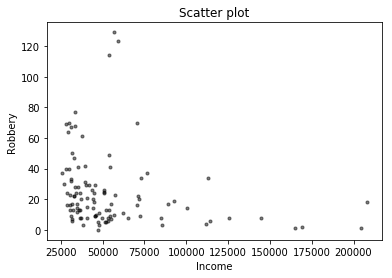

In [32]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Income')
plt.ylabel('Robbery')
plt.show()

Higher income, Lower robbery.

In [40]:
df4=df3.sort_values([ 'Robbery_2016'], ascending=[False])
df4r=df4.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 68
Data columns (total 8 columns):
Neighbourhood    30 non-null object
Borough          30 non-null object
Income_2016      30 non-null object
Robbery_2016     30 non-null object
address          30 non-null object
Coordinates      30 non-null object
latitude         30 non-null float64
longitude        30 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.1+ KB


In [44]:
df5=df3.sort_values([ 'Income_2016'], ascending=[False])
df5i=df5.head(30)

In [45]:
address="Toronto, CA"
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df4r['latitude'], df4r['longitude'], df4r['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
for lat, lng, label in zip(df5i['latitude'], df5i['longitude'], df5i['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 

map_toronto

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


Two areas are divided. Blue dot is highest 30 robbery point, red is highest 30 income point.

## 5. Discussion

Because it is hard to obtain json file, I just used foilum and market and a simple plot. There is a significant finding in this report. There is a high income restaurant with low robbery rate. Also, those neighbourhood are clustered approximately by 3 group. It is hard to cluster in my skills and not enough time.This is very bad. But I did my best to show their relationship.

## 6. Conclusion

Despite of this study's weakness about analyzing diverse, it shows meaningful relationship. According to data, if there are high income restaurant, they are safe than other neighbourhoods. If our stakeholdes are willing to open the restaurant, I'll recommand those place. Safety is most imortant. 